In [84]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load and inspect data

In [2]:
ls ../data/

E2_OCV_P25.mat


In [3]:
data = scipy.io.loadmat('../data/E2_OCV_P25.mat', simplify_cells=True)

In [6]:
fields = list(data['OCVData']['script1'].keys())

In [7]:
fields

['time', 'step', 'current', 'voltage', 'chgAh', 'disAh']

In [17]:
def plot_data(script):

    fig = plt.figure(figsize=(12,8))
    fig.suptitle(script, fontsize=16)

    for i,j in zip(range(1,6), fields[1:]):
        plt.subplot(3, 2, i)
        plt.plot(data['OCVData'][script]['time'],data['OCVData'][script][j])
        plt.xlabel('time (s)',fontsize=12)
        plt.ylabel(j, fontsize=12)
        plt.grid()
        
    plt.tight_layout()

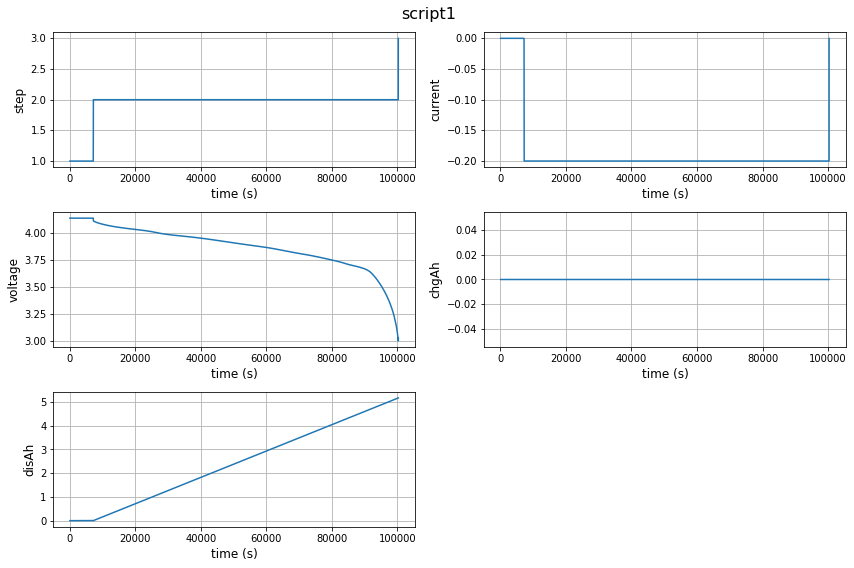

In [9]:
plot_data('script1')

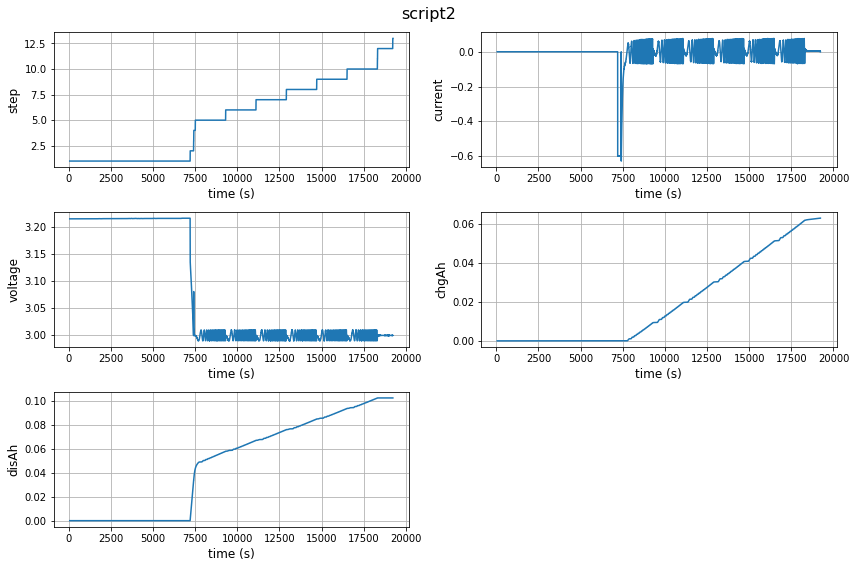

In [10]:
plot_data('script2')

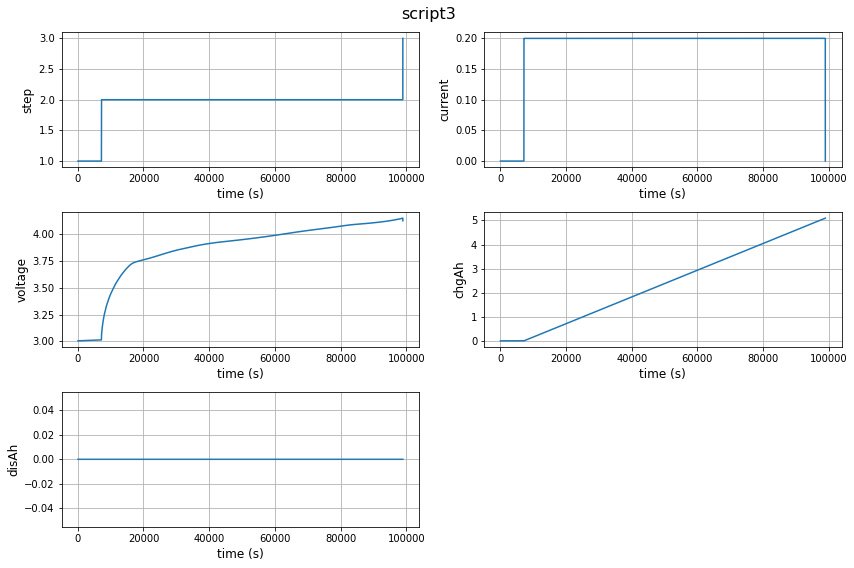

In [11]:
plot_data('script3')

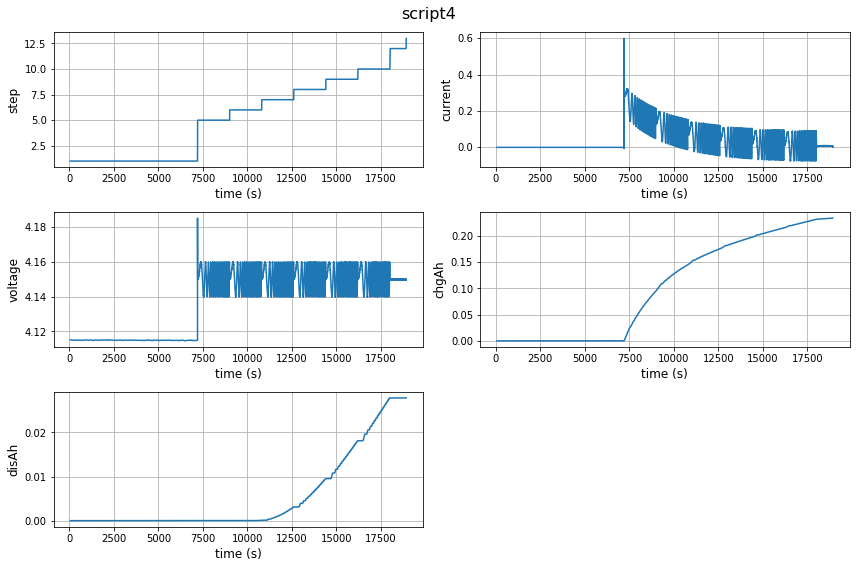

In [12]:
plot_data('script4')

### Find Coulombic Efficiency

In [13]:
scripts = ['script1','script2','script3','script4']

In [14]:
total_discharge = 0
total_charge = 0

for script in scripts: 
    
    total_discharge += data['OCVData'][script]['disAh'][-1]
    total_charge += data['OCVData'][script]['chgAh'][-1]

In [15]:
eta_25 = total_discharge / total_charge

In [16]:
eta_25

0.9833966792302935

### Find Total Capacity

In [23]:
# There really shouldn't be any charging done in Script 1, but 
# this is rigorously defined here to include

Q_25 = data['OCVData']['script1']['disAh'][-1] \
     + data['OCVData']['script2']['disAh'][-1] \
     - eta_25*data['OCVData']['script1']['chgAh'][-1] \
     - eta_25*data['OCVData']['script2']['chgAh'][-1]

In [25]:
Q_25

5.21270581784224

### Finding approximate OCV relationship at this temperature

In [87]:
# Implement this one in Pandas
df_1 = pd.DataFrame(data['OCVData']['script1'])

In [67]:
df_1.head(2)

time  step  current   voltage  chgAh  disAh
0   60.014559     1      0.0  4.138844      0    0.0
1  120.029137     1      0.0  4.138844      0    0.0

In [114]:
# Beginning of discharge
IR1Da = df_1[df_1['step'] == 1].tail(1).voltage.values[0] \
        - df_1[df_1['step'] == 2].head(1).voltage.values[0]
print(IR1Da)

0.02411365509033203


In [115]:
# End of discharge
IR2Da = df_1[df_1['step'] == 3].head(1).voltage.values[0] \
        - df_1[df_1['step'] == 2].tail(1).voltage.values[0]
print(IR2Da)

0.02492833137512207


In [78]:
# Implement this one in Numpy

In [99]:
IndC = np.where(data['OCVData']['script3']['step'] == 2)[0]

In [113]:
# Beginning of charge
IR1Ca = data['OCVData']['script3']['voltage'][IndC[0]] \
        - data['OCVData']['script3']['voltage'][IndC[0]-1]
print(IR1Ca)

0.03209733963012695


In [107]:
# End of charge
IR2Ca = data['OCVData']['script3']['voltage'][IndC[-1]] \
        - data['OCVData']['script3']['voltage'][IndC[-1]+1]
print(IR2Ca)

0.023624897003173828


In [117]:
IR1D = min(IR1Da,2*IR2Ca)
IR2D = min(IR2Da,2*IR1Ca)
IR1C = min(IR1Ca,2*IR2Da)
IR2C = min(IR2Ca,2*IR1Da)
print(IR1D,IR2D,IR1C,IR2C)

0.02411365509033203 0.02492833137512207 0.03209733963012695 0.023624897003173828


In [145]:
IndD = np.where(data['OCVData']['script1']['step'] == 2)[0]

blend = np.linspace(0,1,len(IndD)-1)

In [156]:
IRblend = IR1D + (IR2D-IR1D)*blend

In [157]:
IRblend[100]

0.024122417877088943

In [160]:
blend

array([0.00000000e+00, 1.07561579e-04, 2.15123158e-04, ...,
       9.99784877e-01, 9.99892438e-01, 1.00000000e+00])

In [159]:
(IR2D-IR1D)*blend.reshape(-1,1)

array([[0.00000000e+00],
       [8.76278676e-08],
       [1.75255735e-07],
       ...,
       [8.14501029e-04],
       [8.14588657e-04],
       [8.14676285e-04]])